<a href="https://colab.research.google.com/github/PhanDinhPhong/BTVN3/blob/main/btvn3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.callbacks import EarlyStopping

(x_train_images,y_train_labels),(x_test_images,y_test_labels) = datasets.cifar100.load_data()
x_train_images =x_train_images.astype('float32')
x_test_images = x_test_images.astype('float32')

x_train_images/= 255
x_test_images/= 255
y_train_labels = np_utils.to_categorical(y_train_labels,100)
y_test_labels = np_utils.to_categorical(y_test_labels,100)

169017344/169001437 [==============================] - 4s 0us/step


In [3]:
model = Sequential()
model.add(Conv2D(input_shape =(32, 32, 3),kernel_initializer ='he_uniform',kernel_size =(2,2),padding ='same',strides =(2,2),filters=32))
model.add(MaxPooling2D(pool_size= (2,2),strides =(1,1),padding ='same'))
model.add(Conv2D(kernel_size =(2,2),padding ='same',strides =(2,2),filters =64))
model.add(MaxPooling2D(pool_size = (2,2),strides =(1,1),padding ='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2

In [4]:
from tensorflow import keras
model.compile(optimizer ='Adam', loss ='categorical_crossentropy', metrics =['accuracy'])
history = model.fit(x_train_images,y_train_labels,batch_size =64,epochs =50,verbose= 1,validation_data=(x_test_images,y_test_labels),callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

Epoch 1/50
782/782 [==============================] - 16s 6ms/step - loss: 3.6709 - accuracy: 0.1420 - val_loss: 3.1503 - val_accuracy: 0.2279
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 2.9045 - accuracy: 0.2738 - val_loss: 2.8014 - val_accuracy: 0.2972
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 2.5141 - accuracy: 0.3492 - val_loss: 2.6324 - val_accuracy: 0.3317
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 2.2000 - accuracy: 0.4172 - val_loss: 2.5429 - val_accuracy: 0.3640
Epoch 5/50
782/782 [==============================] - 4s 6ms/step - loss: 1.9096 - accuracy: 0.4785 - val_loss: 2.5388 - val_accuracy: 0.3733
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.6210 - accuracy: 0.5439 - val_loss: 2.6277 - val_accuracy: 0.3759
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 1.3544 - accuracy: 0.6084 - val_loss: 2.8043 - val_accuracy: 0.3719
Epoch

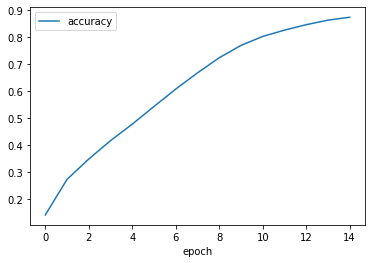

Test error:  4.828394412994385
Test accuracy:  0.3569999933242798


In [5]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()
score = model.evaluate(x_test_images, y_test_labels, verbose=0)
print('Test error: ',score[0])
print('Test accuracy: ',score[1])

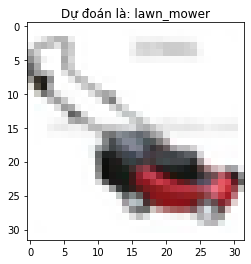

In [6]:
x_pre = x_test_images
y_ktra = y_test_labels


Label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 
         'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 
'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 
'whale', 'willow_tree', 'wolf', 'woman', 'worm']
test = 2001
plt.title("Dự đoán là: " +str(Label[np.argmax(model.predict(x_pre[test].reshape(1, 32, 32, 3)))]))
y_ktra[test]
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

In [7]:
model.save('cifar100_cnn.h5')